# Applied Data Science Capstone: Predicting car accident severity

## I. Introduction
Background: The demand for vehicles rises consistently. Consequently, so does the number of vehicles on the road and the probability of involvement in traffic jams or car accidents. Traffic accidents result not only in loss of human lives but have a huge impact on economy as well.  According to the Michigan Traffic Crash Decade-At-A-Glance study, there were over 314.000 traffic accidents in US in 2017, which translate into costs around 230 billion dollars per year. Approximately 1.3 million people die yearly as a result of road traffic crashes. 

Problem: By collecting and analysing relevant data on car accidents, we aim to establish to what extent can:\
1)	weather conditions\
2)	the total number of people involved in the collision or the number pedestrians\
3)	road conditions or light conditions \
4)	driving under the influence of drugs or alcohol \
help us predict car accident severity.

Interest: Car drivers and vulnerable road users (pedestrians, cyclists, motorcyclists) would or should be interested in an equal manner by the result of this inquiry. Having measured the impact of the abovementioned outer and inner conditions and knowing the results, one might act differently. Having established the (probable) paramount influence of drugs or alcohol in causing car accidents of great severity, authorities might decide to impose higher taxes on such vices. 

## II. Data
### a. Data sources
In order to answer the proposed questions, we shall use data from the SDOT Traffic Management Division, Traffic Records Group. 
The database is updated weekly since 2004 and contains all types of collisions.
Here is the provided link to database: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
The metadata is to be found here: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf
The database contains 37 attributes, including the severity code, the number of persons involved in the car accident, the number of pedestrians, road and light conditions, information on driving under the influence of drugs or alcohol. 

We shall proceed by importing the necessary libraries and reading the data.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import pylab as pl
import scipy.optimize as opt
from sklearn.tree import DecisionTreeClassifier

In [3]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-28 06:35:33--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  43.1MB/s   in 1.6s   

2020-08-28 06:35:34 (43.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [4]:
df=pd.read_csv("Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(194673, 38)

In [6]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


### b. Data cleaning and feature selection

In [7]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df.drop(['X','Y','REPORTNO','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE','INCDTTM','SPEEDING','ST_COLDESC','HITPARKEDCAR'],axis=1,inplace=True)

In [9]:
df['SEVERITYCODE'].equals(df['SEVERITYCODE.1'])

True

In [10]:
df.drop(['STATUS','SEVERITYCODE.1','COLLISIONTYPE','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','PEDROWNOTGRNT','SDOTCOLNUM','ST_COLCODE','SEGLANEKEY','CROSSWALKKEY'],axis=1,inplace=True)

In [11]:
df.shape

(194673, 14)

In [12]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of         SEVERITYCODE  OBJECTID  INCKEY  COLDETKEY      ADDRTYPE   INTKEY  \
0                  2         1    1307       1307  Intersection  37475.0   
1                  1         2   52200      52200         Block      NaN   
2                  1         3   26700      26700         Block      NaN   
3                  1         4    1144       1144         Block      NaN   
4                  2         5   17700      17700  Intersection  34387.0   
5                  1         6  320840     322340  Intersection  36974.0   
6                  1         7   83300      83300  Intersection  29510.0   
7                  2         9  330897     332397  Intersection  29745.0   
8                  1        10   63400      63400         Block      NaN   
9                  2        12   58600      58600  Intersection  34679.0   
10                 1        14   48900      48900         Alley      NaN   
11                 1        15   38800      3

In [13]:
df.head(5)

,SEVERITYCODE,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,1,1307,1307,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,2,0,N,Overcast,Wet,Daylight
1,1,2,52200,52200,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,2,0,0,Raining,Wet,Dark - Street Lights On
2,1,3,26700,26700,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,0,0,Overcast,Dry,Daylight
3,1,4,1144,1144,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,3,0,N,Clear,Dry,Daylight
4,2,5,17700,17700,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,2,0,0,Raining,Wet,Daylight


In [14]:
df.dropna(axis=0,inplace=True)

In [15]:
df.shape

(63462, 14)

In [16]:
df.columns

Index(['SEVERITYCODE', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'ADDRTYPE', 'INTKEY',
       'LOCATION', 'SEVERITYDESC', 'PERSONCOUNT', 'PEDCOUNT', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND'],
      dtype='object')

In [17]:
df.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         2               0.600000
                          1               0.400000
Clear                     1               0.559210
                          2               0.440790
Fog/Smog/Smoke            1               0.527174
                          2               0.472826
Other                     1               0.654135
                          2               0.345865
Overcast                  1               0.576408
                          2               0.423592
Partly Cloudy             2               0.666667
                          1               0.333333
Raining                   1               0.562200
                          2               0.437800
Severe Crosswind          1               0.800000
                          2               0.200000
Sleet/Hail/Freezing Rain  1               0.658537
                          2               0.341463
Snowing                   1               0

In [18]:
df.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.560276
                2               0.439724
Ice             1               0.664948
                2               0.335052
Oil             1               0.500000
                2               0.500000
Other           1               0.583333
                2               0.416667
Sand/Mud/Dirt   1               0.615385
                2               0.384615
Snow/Slush      1               0.675000
                2               0.325000
Standing Water  1               0.700000
                2               0.300000
Unknown         1               0.793011
                2               0.206989
Wet             1               0.568075
                2               0.431925
Name: SEVERITYCODE, dtype: float64

In [19]:
df.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.591195
                          2               0.408805
Dark - Street Lights Off  1               0.570225
                          2               0.429775
Dark - Street Lights On   1               0.572145
                          2               0.427855
Dark - Unknown Lighting   2               0.750000
                          1               0.250000
Dawn                      1               0.529282
                          2               0.470718
Daylight                  1               0.562609
                          2               0.437391
Dusk                      1               0.547259
                          2               0.452741
Other                     1               0.513514
                          2               0.486486
Unknown                   1               0.790829
                          2               0.209171
Name: SEVERITYCODE, dtype: float64

In [20]:
df.groupby(['PERSONCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PERSONCOUNT  SEVERITYCODE
0            1               0.570415
             2               0.429585
1            1               0.709974
             2               0.290026
2            1               0.589807
             2               0.410193
3            1               0.542395
             2               0.457605
4            1               0.515718
             2               0.484282
5            1               0.500184
             2               0.499816
6            2               0.538600
             1               0.461400
7            2               0.562945
             1               0.437055
8            2               0.524272
             1               0.475728
9            2               0.618421
             1               0.381579
10           2               0.644444
             1               0.355556
11           2               0.619048
             1               0.380952
12           2               0.727273
             1          

In [21]:
df.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.607086
          2               0.392914
1         2               0.896967
          1               0.103033
2         2               0.898810
          1               0.101190
3         2               0.937500
          1               0.062500
4         2               1.000000
Name: SEVERITYCODE, dtype: float64

In [22]:
df['UNDERINFL'].replace(to_replace=['Y','N'],value=[1,0],inplace=True)

In [23]:
df['UNDERINFL']=pd.to_numeric(df['UNDERINFL'],errors='coerce')

In [24]:
ui=df['UNDERINFL'].value_counts()
ui

0    61231
1     2231
Name: UNDERINFL, dtype: int64

In [25]:
print("The number of people driving under the influence of drugs or alcohol (out of 194673 car accidents) is", ui[1])

The number of people driving under the influence of drugs or alcohol (out of 194673 car accidents) is 2231


In [26]:
ui[1]/63462*100

3.5154895843181744

In [27]:
ui=DataFrame(ui)
ui

,UNDERINFL
0,61231
1,2231


In [28]:
df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          1               0.571541
           2               0.428459
1          2               0.510533
           1               0.489467
Name: SEVERITYCODE, dtype: float64

In [29]:
df['SEVERITYCODE'].value_counts(normalize=False)

1    36088
2    27374
Name: SEVERITYCODE, dtype: int64

## III. Methodology

### i. Exploratory data analysis

In [30]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [31]:
z=df['WEATHER'].value_counts()
z=DataFrame(z)

Text(0.5, 1.0, 'Regarding weather conditions')

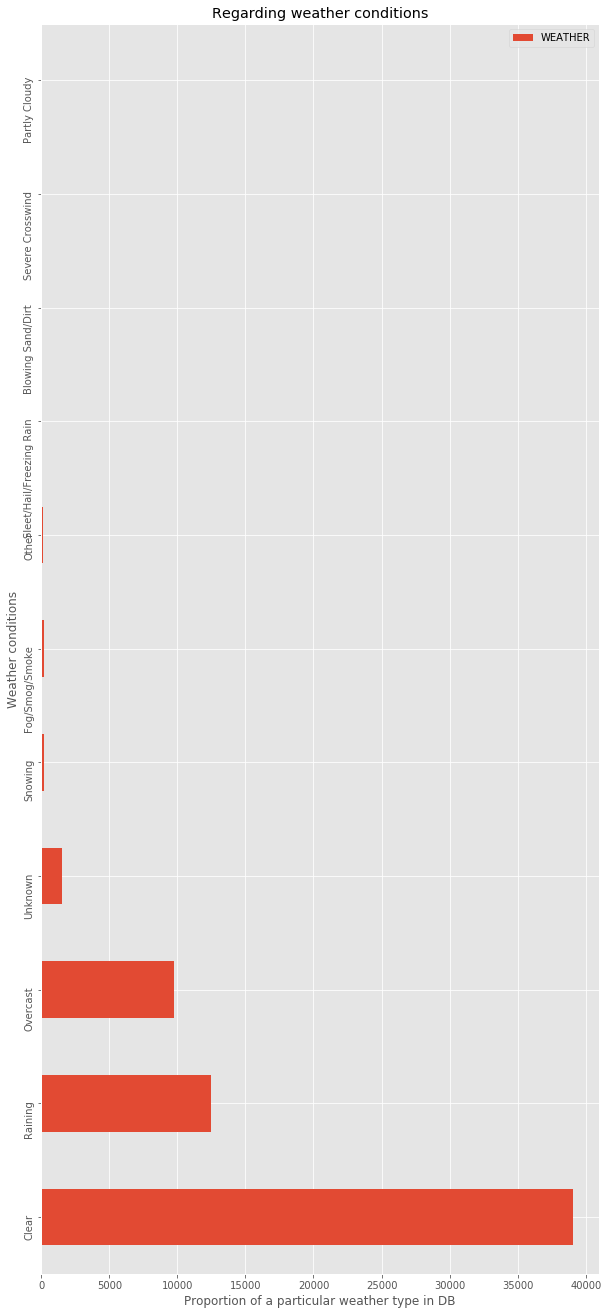

In [32]:
z.plot(kind='barh', figsize=(10, 23), rot=90)

plt.xlabel('Proportion of a particular weather type in DB')
plt.ylabel('Weather conditions')
plt.title('Regarding weather conditions')

In [33]:
z

,WEATHER
Clear,39039
Raining,12508
Overcast,9783
Unknown,1541
Snowing,215
Fog/Smog/Smoke,184
Other,133
Sleet/Hail/Freezing Rain,41
Blowing Sand/Dirt,10
Severe Crosswind,5


In [34]:
t=df['LIGHTCOND'].value_counts()

Text(0.5, 1.0, 'Regarding light conditions')

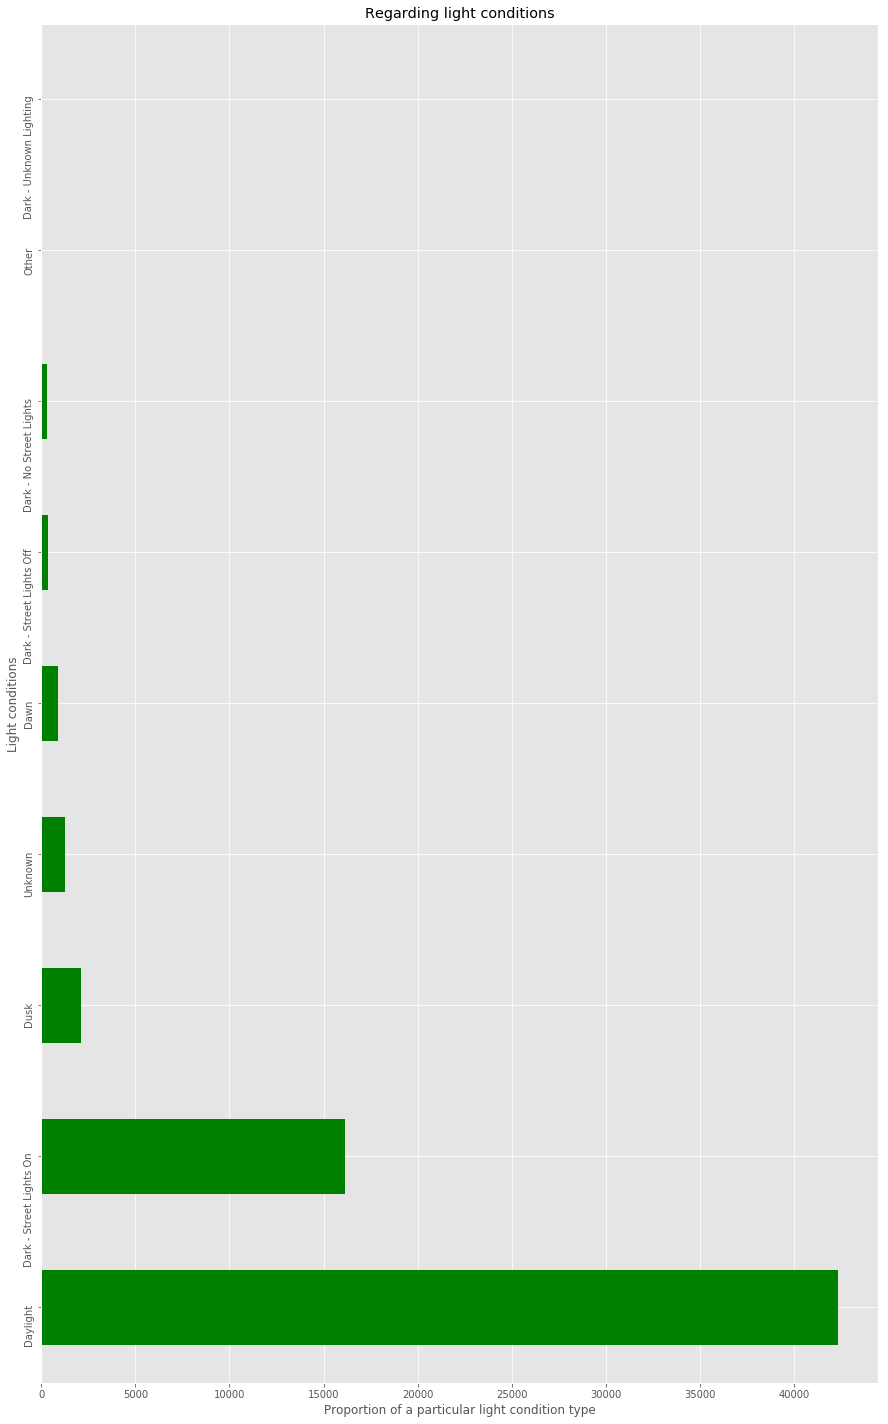

In [35]:
t.plot(kind='barh', figsize=(15, 25), rot=90, color='green')

plt.xlabel('Proportion of a particular light condition type')
plt.ylabel('Light conditions')
plt.title('Regarding light conditions')

In [37]:
v=df['ROADCOND'].value_counts()

Text(0.5, 1.0, 'Regarding road conditions')

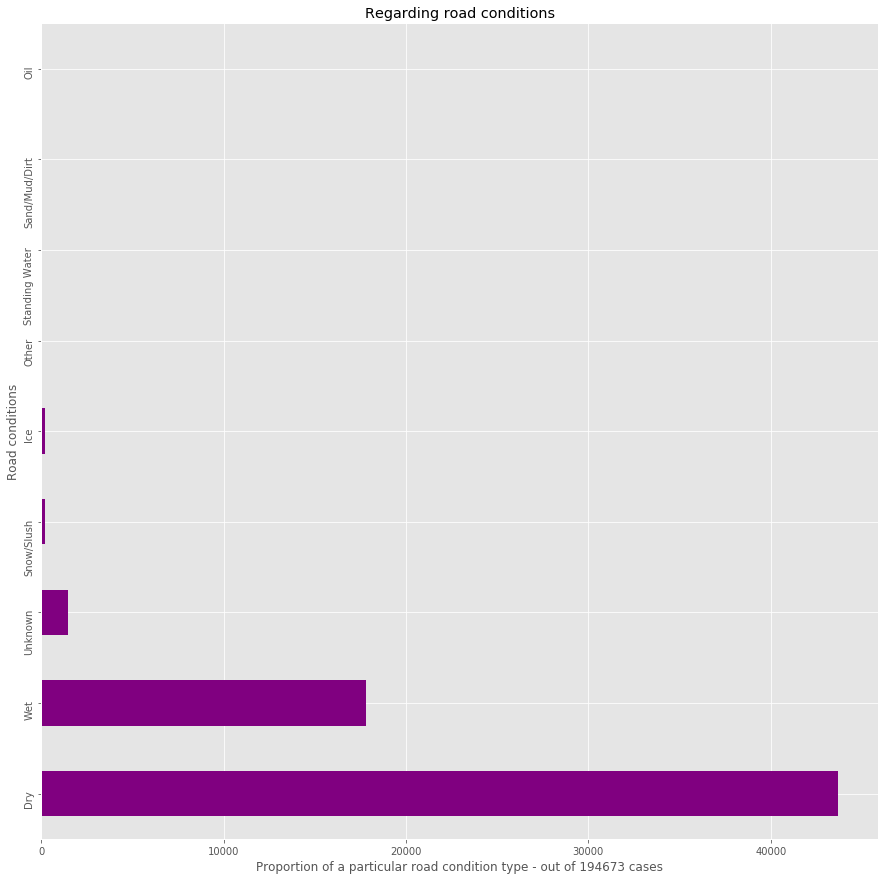

In [38]:
v.plot(kind='barh', figsize=(15, 15), rot=90, color='purple')

plt.xlabel('Proportion of a particular road condition type - out of 194673 cases')
plt.ylabel('Road conditions')
plt.title('Regarding road conditions')

In [39]:
df.shape

(63462, 14)

In [42]:
p=DataFrame(df['PEDCOUNT'].value_counts())
p['INDEX']=p.index+1

In [43]:
p

,PEDCOUNT,INDEX
0,58626,1
1,4649,2
2,168,3
3,16,4
4,3,5


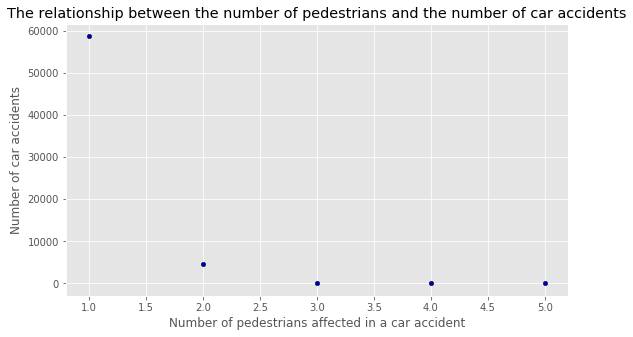

In [44]:
p.plot(kind='scatter', x='INDEX', y='PEDCOUNT', figsize=(9, 5), color='darkblue')

plt.title('The relationship between the number of pedestrians and the number of car accidents')
plt.xlabel('Number of pedestrians affected in a car accident')
plt.ylabel('Number of car accidents')

plt.show()

In [45]:
ps=DataFrame(df['PERSONCOUNT'].value_counts())
ps['INDEX']=ps.index+1

In [46]:
ps

,PERSONCOUNT,INDEX
2,35259,3
3,13551,4
4,5726,5
5,2713,6
1,2286,2
0,1974,1
6,1114,7
7,421,8
8,206,9
9,76,10


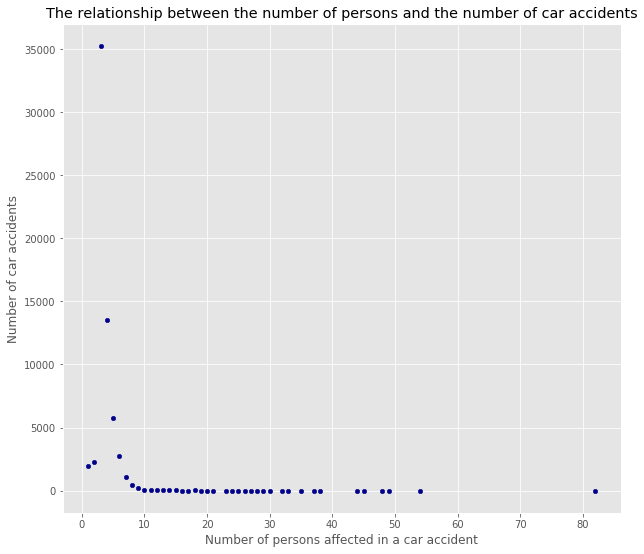

In [47]:
ps.plot(kind='scatter', x='INDEX', y='PERSONCOUNT', figsize=(10, 9), color='darkblue')

plt.title('The relationship between the number of persons and the number of car accidents')
plt.xlabel('Number of persons affected in a car accident')
plt.ylabel('Number of car accidents')

plt.show()

In [48]:
df[['PERSONCOUNT','PEDCOUNT']].describe()

,PERSONCOUNT,PEDCOUNT
count,63462.000000,63462.000000
mean,2.586020,0.079496
std,1.443722,0.283818
min,0.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,0.000000
max,81.000000,4.000000


In [49]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.24-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

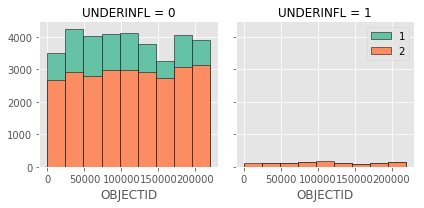

In [51]:
import seaborn as sns

bins = np.linspace(df.OBJECTID.min(), df.OBJECTID.max(), 10)
g = sns.FacetGrid(df, col="UNDERINFL", hue="SEVERITYCODE", palette="Set2", col_wrap=2)
g.map(plt.hist, 'OBJECTID', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Featureset selection

In [52]:
featureset=df[['WEATHER','UNDERINFL','PERSONCOUNT','PEDCOUNT','LIGHTCOND','ROADCOND']]

In [53]:
featureset = pd.concat([featureset,pd.get_dummies(df['WEATHER'])], axis=1)

In [54]:
featureset.head()

,WEATHER,UNDERINFL,PERSONCOUNT,PEDCOUNT,LIGHTCOND,ROADCOND,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,Overcast,0,2,0,Daylight,Wet,0,0,0,0,1,0,0,0,0,0,0
4,Raining,0,2,0,Daylight,Wet,0,0,0,0,0,0,1,0,0,0,0
5,Clear,0,2,0,Daylight,Dry,0,1,0,0,0,0,0,0,0,0,0
6,Raining,0,2,0,Daylight,Wet,0,0,0,0,0,0,1,0,0,0,0
7,Clear,0,3,0,Daylight,Dry,0,1,0,0,0,0,0,0,0,0,0


In [55]:
featureset = pd.concat([featureset,pd.get_dummies(df['LIGHTCOND'])], axis=1)

In [56]:
featureset = pd.concat([featureset,pd.get_dummies(df['ROADCOND'])], axis=1)

In [57]:
featureset.columns

Index(['WEATHER', 'UNDERINFL', 'PERSONCOUNT', 'PEDCOUNT', 'LIGHTCOND',
       'ROADCOND', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Other',
       'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind',
       'Sleet/Hail/Freezing Rain', 'Snowing', 'Unknown',
       'Dark - No Street Lights', 'Dark - Street Lights Off',
       'Dark - Street Lights On', 'Dark - Unknown Lighting', 'Dawn',
       'Daylight', 'Dusk', 'Other', 'Unknown', 'Dry', 'Ice', 'Oil', 'Other',
       'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Unknown', 'Wet'],
      dtype='object')

In [58]:
featureset.drop(['WEATHER','ROADCOND','LIGHTCOND'], axis = 1,inplace=True)

### ii. Inferential statistical testing

In [59]:
from scipy import stats

In [60]:
spearman1, p_value=stats.spearmanr(df['UNDERINFL'],df['SEVERITYCODE'])

In [61]:
spearman1

0.030520403568489365

In [62]:
p_value

1.468617911221269e-14

In [63]:
spearman2, p_value2=stats.spearmanr(df['PERSONCOUNT'],df['SEVERITYCODE'])

In [64]:
spearman2

0.07969146020054005

In [65]:
p_value2

6.383470174888863e-90

In [66]:
spearman3, p_value3=stats.spearmanr(df['PEDCOUNT'],df['SEVERITYCODE'])

In [67]:
spearman3

0.2701512650873703

In [68]:
p_value3

0.0

In [69]:
spearman4, p_value4=stats.spearmanr(featureset['Raining'],df['SEVERITYCODE'])

In [71]:
spearman4

0.006457564077410389

In [72]:
p_value4

0.1037896003190338

In [74]:
spearman5,p_value5=stats.spearmanr(featureset['Dark - Street Lights Off'],df['SEVERITYCODE'])
spearman5

-0.00023801447603085443

In [75]:
p_value5

0.9521885838869751

In [76]:
spearman6,p_value6=stats.spearmanr(featureset['Standing Water'],df['SEVERITYCODE'])
spearman6

-0.004708715727059873

In [77]:
p_value6

0.23554841324300857

In [78]:
spearman7,p_value7=stats.spearmanr(featureset['Daylight'],df['SEVERITYCODE'])
spearman7

0.017285109878295717

In [79]:
p_value7

1.3328179125477778e-05

In [80]:
spearman8,p_value8=stats.spearmanr(featureset['Sand/Mud/Dirt'],df['SEVERITYCODE'])
spearman8

-0.001350555101662847

In [81]:
p_value8

0.7336902746166554

### iii. Machine Learning Models

## Support Vector Machine (SVM)

In [82]:
X=featureset

In [83]:
y=df['SEVERITYCODE'].values

In [84]:
y[0:5]

array([2, 2, 1, 1, 2])

In [85]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.19088162, -0.40591228, -0.28009889, -0.01255386, -1.26429913,
        -0.05392405, -0.04582732,  2.34242763, -0.00687565, -0.49545566,
        -0.00887657, -0.02542584, -0.05830412, -0.15775471, -0.07096554,
        -0.0751086 , -0.58403418, -0.00793938, -0.12027804,  0.70625457,
        -0.18572258, -0.02415297, -0.14134292, -1.48743153, -0.05537437,
        -0.01375228, -0.0194505 , -0.01431394, -0.05622682, -0.01775524,
        -0.15495183,  1.60139935],
       [-0.19088162, -0.40591228, -0.28009889, -0.01255386, -1.26429913,
        -0.05392405, -0.04582732, -0.42690753, -0.00687565,  2.01834408,
        -0.00887657, -0.02542584, -0.05830412, -0.15775471, -0.07096554,
        -0.0751086 , -0.58403418, -0.00793938, -0.12027804,  0.70625457,
        -0.18572258, -0.02415297, -0.14134292, -1.48743153, -0.05537437,
        -0.01375228, -0.0194505 , -0.01431394, -0.05622682, -0.01775524,
        -0.15495183,  1.60139935],
       [-0.19088162, -0.40591228, -0.28009889, -0.0125

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (50769, 32) (50769,)
Test set: (12693, 32) (12693,)


In [87]:
from sklearn import svm
SVM_model = svm.SVC(gamma='scale')
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
yhat = SVM_model.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           1       0.61      0.97      0.75      7188
           2       0.84      0.19      0.31      5505

   micro avg       0.63      0.63      0.63     12693
   macro avg       0.73      0.58      0.53     12693
weighted avg       0.71      0.63      0.56     12693

Confusion matrix, without normalization
[[6991  197]
 [4458 1047]]


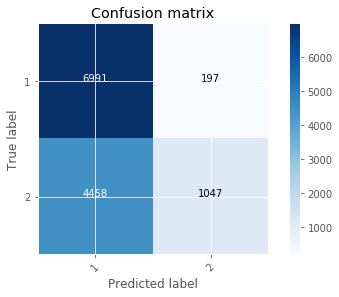

In [91]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

In [92]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.5594158617301305

In [93]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6332624281099819

## Logistic Regression (LR)

In [94]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
yhat2 = LR_model.predict(X_test)
yhat2

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
yhat_prob = LR_model.predict_proba(X_test)
yhat_prob

array([[0.63, 0.37],
       [0.61, 0.39],
       [0.63, 0.37],
       ...,
       [0.67, 0.33],
       [0.56, 0.44],
       [0.67, 0.33]])

In [97]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6326192709245222

In [98]:
f1_score(y_test, yhat2, average='weighted')

0.5658557811404462

In [99]:
jaccard_similarity_score(y_test, yhat2)

0.6339714803434964

## For _Discussion_ and _Conclusion_ please refer to the full report.

#### Thank you very much for your consideration and time.